### This notebook will be mainly used for the capstone project!

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
sns.set_context('notebook', font_scale=1.5)
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


## Capstone Project
### Introduction / Business Problem - Possible Upgrade to Canadian 911 Services in Toronto


Under provincial jurisdinction, the operation of the 911 servicies is practiced by the hands of local police, paramedics or firefighting authorities. The internationally accepted standard for answering 911 calls suggests 90% of all calls should be picked up within 10 seconds, or 95% calls should be answered within 20 seconds even during the busiest time of day. There has been many attempts to solve a common, yet the most important, problem of the 911 service in Toronto. When there is a large volume of calls are coming at once, there is a significant 911 wait times at the communication centre (maximum  wait time up to 5 minutes), leading many dalays in police, paramedic, and firefigther dispatch. It has been reported that nearly 1 in 5 calls to 911 in York Region so far in 2017 were unintentional. 

This project will analyze information based on what is sent to the Ontario Fire Marshal relating to all incidents to which Toronto Fire responds. The type and frequency of all incidents will be categorized by the regions in and around the city of Toronto. The conclusion may help determining the number of hiring more call operators or providing ideas which regions the communication centre or the 911 control headquater should put more focus in order to reduce the wait time on 911 calls.

In [6]:
# All 911 calls in 2019
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_f69201212057400d81a8ccf92a933923 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='TyIT425KrwaU5k2b0rVJLOTYm3WfhGUBN4qYNWPixtgA',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_f69201212057400d81a8ccf92a933923.get_object(Bucket='couseracapstone-donotdelete-pr-saosut8th7aqnw',Key='2017_Basic_Incident_Details.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
call_df = df_data_1
call_df.dtypes



Incident Number                 object
Initial CAD Event Type          object
Initial CAD Event Call Type     object
Final Incident Type             object
Event Alarm Level                int64
Call Source                     object
Incident Station Area          float64
Incident Ward                    int64
LATITUDE                       float64
Longitude                      float64
Intersection                    object
TFS Alarm Time                  object
TFS Arrival Time                object
Last TFS Unit Clear Time        object
Persons Rescued                float64
dtype: object

### Description of the dataset
#### Fire Incidents Data - Only 'Fire' type incidents in 2017
#### Fire Station x_y - locations of the fire station in Toronto (lat, lon)
#### 2017 Basic Incident Details - All incidents reported from 911 calls in 2017

In [7]:

body = client_f69201212057400d81a8ccf92a933923.get_object(Bucket='couseracapstone-donotdelete-pr-saosut8th7aqnw',Key='Geospatial_Coordinates.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_4 = pd.read_csv(body)
post_df=df_data_4
post_df.head()



,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [8]:
post_df.rename(columns ={'Postal Code':'Postcode'}, inplace=True)

In [9]:
# check for missing values
call_df.isnull().sum()[call_df.isnull().any()==True]

Final Incident Type         6
Call Source                 8
Incident Station Area       3
LATITUDE                    2
Longitude                   2
Intersection                2
TFS Arrival Time         1771
Persons Rescued             8
dtype: int64

In [10]:

body = client_f69201212057400d81a8ccf92a933923.get_object(Bucket='couseracapstone-donotdelete-pr-saosut8th7aqnw',Key='toronto.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_5 = pd.read_csv(body)
toronto_df=df_data_5
toronto_df.head()


,Postcode,Borough,Neighbourhood
0,M5R,Central Toronto,Yorkville
1,M3J,North York,York University
2,M2P,North York,York Mills West
3,M2L,North York,York Mills
4,M4C,East York,Woodbine Heights


In [11]:
# Post code area
toronto_df.drop(toronto_df[toronto_df['Borough'] == "Not assigned"].index, inplace = True)
new_df = toronto_df.groupby(['Postcode','Borough'])['Neighbourhood'].apply(lambda x: ','.join(x)).reset_index()
post_df = pd.merge(new_df, post_df, on='Postcode')
post_df.head(50)

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge,Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill,Port Union,Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"West Hill,Morningside,Guildwood",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"Kennedy Park,Ionview,East Birchmount Park",43.727929,-79.262029
7,M1L,Scarborough,"Oakridge,Golden Mile,Clairlea",43.711112,-79.284577
8,M1M,Scarborough,"Scarborough Village West,Cliffside,Cliffcrest",43.716316,-79.239476
9,M1N,Scarborough,"Cliffside West,Birch Cliff",43.692657,-79.264848


In [12]:
post_df.dtypes

Postcode          object
Borough           object
Neighbourhood     object
Latitude         float64
Longitude        float64
dtype: object

In [13]:
call_df.shape

(61779, 15)

In [14]:
call_df.dropna(subset=['Final Incident Type'], inplace=True)
call_df.dropna(subset=['Incident Station Area'], inplace=True)
call_df.dropna(subset=['LATITUDE'], inplace=True)
call_df.dropna(subset=['Longitude'], inplace=True)

call_df.shape


(61768, 15)

In [15]:
call_df.rename(columns = {'Incident Station Area':'station_id'}, inplace=True)
call_df.dtypes

Incident Number                 object
Initial CAD Event Type          object
Initial CAD Event Call Type     object
Final Incident Type             object
Event Alarm Level                int64
Call Source                     object
station_id                     float64
Incident Ward                    int64
LATITUDE                       float64
Longitude                      float64
Intersection                    object
TFS Alarm Time                  object
TFS Arrival Time                object
Last TFS Unit Clear Time        object
Persons Rescued                float64
dtype: object

In [16]:
# Fire Station Location
body = client_f69201212057400d81a8ccf92a933923.get_object(Bucket='couseracapstone-donotdelete-pr-saosut8th7aqnw',Key='fire station x_y.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)
station_df = df_data_2

station_df.station_id = station_df.station_id.astype(float)

station_df.head()

,station_id,East,North,Latitude,Longitude
0,111.0,629254.562,4849606.500,43.788230,-79.393539
1,112.0,625241.895,4847922.113,43.773760,-79.443786
2,113.0,632675.000,4849871.000,43.790005,-79.350979
3,114.0,627526.500,4847651.500,43.770934,-79.415473
4,115.0,633496.245,4847881.079,43.771948,-79.341271


In [17]:
station_df.rename(columns = {'Latitude':'st_lat', 'Longitude':'st_lon'}, inplace=True)

In [18]:
# Merging fire station dataframe with call reasion on 'station_id'
to_df = pd.merge(call_df, station_df, on= 'station_id')

In [19]:
to_df.rename(columns = {'Fianl Incident Type':'call_reason'}, inplace=True)
to_df.head()

,Incident Number,Initial CAD Event Type,Initial CAD Event Call Type,Final Incident Type,Event Alarm Level,Call Source,station_id,Incident Ward,LATITUDE,Longitude,Intersection,TFS Alarm Time,TFS Arrival Time,Last TFS Unit Clear Time,Persons Rescued,East,North,st_lat,st_lon
0,F17007479,Medical,Medical,89 - Other Medical,0,03 - From Ambulance,344.0,11,43.664088,-79.415992,Bloor St W / Manning Ave,1/23/2017 7:24,NaN,1/23/2017 7:41,0.0,628033.938,4836538.0,43.670819,-79.411816
1,F17009854,Medical,Medical,89 - Other Medical,0,03 - From Ambulance,344.0,11,43.666657,-79.403871,Spadina Ave / Bloor St W / Spadina Rd,1/30/2017 20:32,NaN,1/30/2017 20:34,0.0,628033.938,4836538.0,43.670819,-79.411816
2,F17010015,FAR - Alarm Residential,Emergency Fire,35 - Human - Accidental (alarm accidentally ac...,0,05 - Telephone from Monitoring Agency,344.0,12,43.677417,-79.408131,Spadina Rd / Davenport Rd,1/31/2017 10:35,1/31/2017 10:39,1/31/2017 10:46,0.0,628033.938,4836538.0,43.670819,-79.411816
3,F17010033,Medical,Medical,89 - Other Medical,0,03 - From Ambulance,344.0,11,43.670309,-79.405305,Spadina Rd / Kendal Ave,1/31/2017 11:26,1/31/2017 11:30,1/31/2017 11:50,0.0,628033.938,4836538.0,43.670819,-79.411816
4,F17010048,Medical,Medical,89 - Other Medical,0,03 - From Ambulance,344.0,11,43.668114,-79.412384,Bathurst St / Barton Ave,1/31/2017 12:15,1/31/2017 12:18,1/31/2017 12:51,0.0,628033.938,4836538.0,43.670819,-79.411816


In [20]:
to_df.loc[to_df['station_id'] == 325.0]

,Incident Number,Initial CAD Event Type,Initial CAD Event Call Type,Final Incident Type,Event Alarm Level,Call Source,station_id,Incident Ward,LATITUDE,Longitude,Intersection,TFS Alarm Time,TFS Arrival Time,Last TFS Unit Clear Time,Persons Rescued,East,North,st_lat,st_lon
27586,F17009851,REE - Rescue - Elevator,Technical Rescue,66 - Persons Trapped in Elevator,0,01 - 911,325.0,13,43.656163,-79.370123,Sherbourne St / Shuter St / Moss Park Trl,1/30/2017 20:17,1/30/2017 20:21,1/30/2017 20:37,1.0,631818.25,4835138.5,43.657562,-79.365234
27587,F17009864,Medical,Medical,89 - Other Medical,0,03 - From Ambulance,325.0,13,43.656501,-79.377148,Dundas St E / Church St,1/30/2017 21:12,1/30/2017 21:16,1/30/2017 21:20,0.0,631818.25,4835138.5,43.657562,-79.365234
27588,F17009866,Medical,Medical,89 - Other Medical,0,03 - From Ambulance,325.0,13,43.662972,-79.362334,Gerrard St E / Nasmith Ave,1/30/2017 21:26,1/30/2017 21:29,1/30/2017 22:09,0.0,631818.25,4835138.5,43.657562,-79.365234
27589,F17009910,FAR - Alarm Residential,Emergency Fire,32 - Alarm System Equipment - Accidental activ...,0,05 - Telephone from Monitoring Agency,325.0,13,43.658295,-79.371032,Dundas St E / Sherbourne St,1/31/2017 0:38,1/31/2017 0:42,1/31/2017 0:50,0.0,631818.25,4835138.5,43.657562,-79.365234
27590,F17009923,Medical,Medical,89 - Other Medical,0,03 - From Ambulance,325.0,14,43.658332,-79.352239,Queen St E / Carroll St,1/31/2017 3:31,1/31/2017 3:37,1/31/2017 3:49,0.0,631818.25,4835138.5,43.657562,-79.365234
27591,F17009924,Medical,Medical,89 - Other Medical,0,03 - From Ambulance,325.0,13,43.656163,-79.370123,Sherbourne St / Shuter St / Moss Park Trl,1/31/2017 3:33,1/31/2017 3:38,1/31/2017 3:44,0.0,631818.25,4835138.5,43.657562,-79.365234
27592,F17009942,FAHRD - Alarm Highrise Residential Downtown,Emergency Fire,"33 - Human - Malicious intent, prank",0,05 - Telephone from Monitoring Agency,325.0,13,43.656163,-79.370123,Sherbourne St / Shuter St / Moss Park Trl,1/31/2017 6:12,1/31/2017 6:16,1/31/2017 6:23,0.0,631818.25,4835138.5,43.657562,-79.365234
27593,F17009944,Medical,Medical,89 - Other Medical,0,03 - From Ambulance,325.0,13,43.660654,-79.374851,Gerrard St E / George St,1/31/2017 6:25,1/31/2017 6:27,1/31/2017 6:38,0.0,631818.25,4835138.5,43.657562,-79.365234
27594,F17010006,Medical,Medical,89 - Other Medical,0,03 - From Ambulance,325.0,13,43.663880,-79.364553,Spruce St / Sackville St,1/31/2017 10:08,1/31/2017 10:11,1/31/2017 10:15,0.0,631818.25,4835138.5,43.657562,-79.365234
27595,F17010009,FACC - Fire Alarm - Check Call,Other Emergency Events,39 - Other False Fire Call,0,02 - Telephone from Civlian (other than 911),325.0,13,43.656794,-79.365657,Shuter St / Poulett St,1/31/2017 10:21,1/31/2017 10:24,1/31/2017 10:25,0.0,631818.25,4835138.5,43.657562,-79.365234


Text(0.5,1,'Top 5 Station for 911 calls')

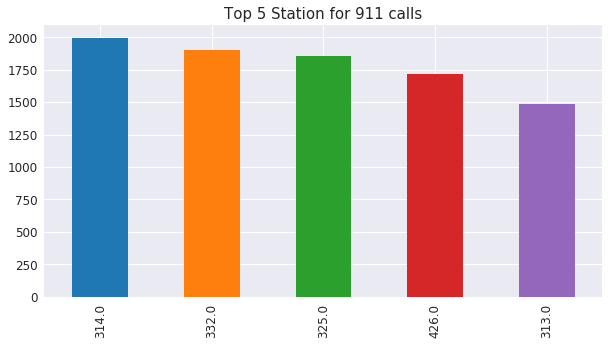

In [21]:
# 5 Top Station that are dispatched in a response for 911 calls
plt.figure(figsize=(10,5))

to_df.station_id.value_counts().head().plot(kind='bar')
plt.tick_params(axis='both',labelsize =12)
plt.title('Top 5 Station for 911 calls',fontsize=15)


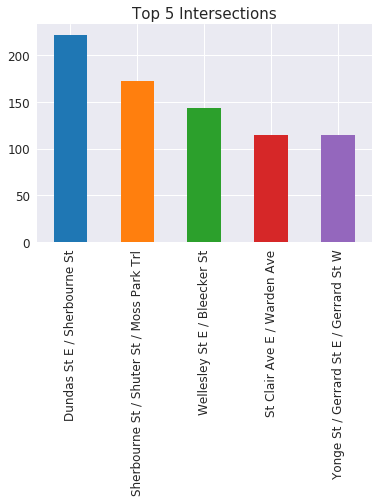

In [22]:
# 5 Top intersection
to_df.Intersection.value_counts().head().plot(kind='bar')
plt.tick_params(axis='both',labelsize =12)
plt.title('Top 5 Intersections',fontsize=15)

plt.show()

In [56]:
# Filtering the DataFrame with top 5 intersections and station
to_df.rename(columns = {'Final Incident Type':'call_reason'}, inplace=True)

new_to_df = to_df[(to_df['Intersection'] == 'Dundas St E / Sherbourne St') | (to_df['Intersection']=='Sherbourne St / Shuter St / Moss Park Trl') | (to_df['Intersection']=='Wellesley St E / Bleecker St') |(to_df['Intersection']=='St Clair Ave E / Warden Ave')| (to_df['Intersection']=='Yonge St / Gerrard St E / Gerrard St W') ]
top_to_df = new_to_df[(new_to_df['station_id'] == 313.0) | (new_to_df['station_id']==314.0) | (new_to_df['station_id']==325.0) |(new_to_df['station_id']==332.0)| (new_to_df['station_id']==426.0) ]
top_to_df.head()

,Incident Number,Initial CAD Event Type,Initial CAD Event Call Type,call_reason,Event Alarm Level,Call Source,station_id,Incident Ward,LATITUDE,Longitude,Intersection,TFS Alarm Time,TFS Arrival Time,Last TFS Unit Clear Time,Persons Rescued,East,North,st_lat,st_lon,Call_Reason
11399,F17010745,Medical,Medical,89 - Other Medical,0,03 - From Ambulance,314.0,13,43.659096,-79.382118,Yonge St / Gerrard St E / Gerrard St W,2/2/2017 17:48,2/2/2017 17:53,2/2/2017 18:07,0.0,630172.125,4835471.0,43.660844,-79.38556,89 - Other Medical
11420,F17011542,Medical,Medical,89 - Other Medical,0,03 - From Ambulance,314.0,13,43.659096,-79.382118,Yonge St / Gerrard St E / Gerrard St W,2/5/2017 10:34,2/5/2017 10:37,2/5/2017 11:21,0.0,630172.125,4835471.0,43.660844,-79.38556,89 - Other Medical
11430,F17011947,Medical,Medical,89 - Other Medical,0,03 - From Ambulance,314.0,11,43.659096,-79.382118,Yonge St / Gerrard St E / Gerrard St W,2/6/2017 16:47,2/6/2017 16:51,2/6/2017 17:04,0.0,630172.125,4835471.0,43.660844,-79.38556,89 - Other Medical
11433,F17011995,FAHRD - Alarm Highrise Residential Downtown,Emergency Fire,"33 - Human - Malicious intent, prank",0,05 - Telephone from Monitoring Agency,314.0,13,43.659096,-79.382118,Yonge St / Gerrard St E / Gerrard St W,2/6/2017 19:37,2/6/2017 19:40,2/6/2017 19:50,0.0,630172.125,4835471.0,43.660844,-79.38556,"33 - Human - Malicious intent, prank"
11440,F17012399,FACI - Alarm Commercial/Industrial,Emergency Fire,34 - Human - Perceived Emergency,0,05 - Telephone from Monitoring Agency,314.0,11,43.659096,-79.382118,Yonge St / Gerrard St E / Gerrard St W,2/7/2017 20:42,2/7/2017 20:46,2/7/2017 20:58,0.0,630172.125,4835471.0,43.660844,-79.38556,34 - Human - Perceived Emergency


In [73]:
# filter columns
filtered_df = top_to_df.filter(items=['call_reason', 'station_id', 'LATITUDE', 'Longitude', 'Intersection', 'st_lat','st_lon'])
filtered_df.head()


,call_reason,station_id,LATITUDE,Longitude,Intersection,st_lat,st_lon
11399,89 - Other Medical,314.0,43.659096,-79.382118,Yonge St / Gerrard St E / Gerrard St W,43.660844,-79.38556
11420,89 - Other Medical,314.0,43.659096,-79.382118,Yonge St / Gerrard St E / Gerrard St W,43.660844,-79.38556
11430,89 - Other Medical,314.0,43.659096,-79.382118,Yonge St / Gerrard St E / Gerrard St W,43.660844,-79.38556
11433,"33 - Human - Malicious intent, prank",314.0,43.659096,-79.382118,Yonge St / Gerrard St E / Gerrard St W,43.660844,-79.38556
11440,34 - Human - Perceived Emergency,314.0,43.659096,-79.382118,Yonge St / Gerrard St E / Gerrard St W,43.660844,-79.38556


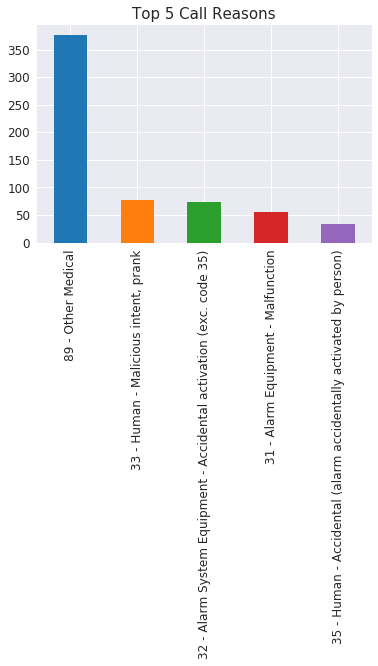

In [42]:
new_to_df.call_reason.value_counts().head().plot(kind='bar')
plt.tick_params(axis='both',labelsize =12)
plt.title('Top 5 Call Reasons',fontsize=15)

plt.show()


### Analyzing Top 5 Intersection by Call Reasons

In [43]:
new_to_df.groupby('Intersection').count()

,Incident Number,Initial CAD Event Type,Initial CAD Event Call Type,call_reason,Event Alarm Level,Call Source,station_id,Incident Ward,LATITUDE,Longitude,TFS Alarm Time,TFS Arrival Time,Last TFS Unit Clear Time,Persons Rescued,East,North,st_lat,st_lon,Call_Reason
Intersection,,,,,,,,,,,,,,,,,,,
Dundas St E / Sherbourne St,222,222,222,222,222,222,222,222,222,222,222,217,222,222,222,222,222,222,222
Sherbourne St / Shuter St / Moss Park Trl,172,172,172,172,172,172,172,172,172,172,172,170,172,172,172,172,172,172,172
St Clair Ave E / Warden Ave,115,115,115,115,115,115,115,115,115,115,115,113,115,115,115,115,115,115,115
Wellesley St E / Bleecker St,143,143,143,143,143,143,143,143,143,143,143,140,143,143,143,143,143,143,143
Yonge St / Gerrard St E / Gerrard St W,114,114,114,114,114,114,114,114,114,114,114,113,114,114,114,114,114,114,114


In [44]:
# one hot encoding
toronto_onehot = pd.get_dummies(new_to_df[['call_reason']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Intersection'] = new_to_df['Intersection'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Intersection,01 - Fire,"03 - NO LOSS OUTDOOR fire (exc: Sus.arson,vandal,child playing,recycling or dump fires)","21 - Overheat (no fire, e.g. engines, mechanical devices)",22 - Pot on Stove (no fire),23 - Open air burning/unauthorized controlled burning (no uncontrolled fire),24 - Other Cooking/toasting/smoke/steam (No Fire),29 - Other pre fire conditions (no fire),31 - Alarm Equipment - Malfunction,32 - Alarm System Equipment - Accidental activation (exc. code 35),"33 - Human - Malicious intent, prank",34 - Human - Perceived Emergency,35 - Human - Accidental (alarm accidentally activated by person),39 - Other False Fire Call,41 - Gas Leak - Natural Gas,44 - Gas Leak - Miscellaneous,"49 - Ruptured Water, Steam Pipe","50 - Power Lines Down, Arcing",58 - Public Hazard call false alarm,59 - Other Public Hazard,62 - Vehicle Collision,66 - Persons Trapped in Elevator,89 - Other Medical,92 - Assistance to Police (exc 921 and 922),94 - Other Public Service,96 - Cancelled on route,97 - Incident not found,99 - Other Response
11399,Yonge St / Gerrard St E / Gerrard St W,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
11420,Yonge St / Gerrard St E / Gerrard St W,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
11430,Yonge St / Gerrard St E / Gerrard St W,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
11433,Yonge St / Gerrard St E / Gerrard St W,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11440,Yonge St / Gerrard St E / Gerrard St W,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [45]:
toronto_onehot.shape

(766, 28)

### Grouping rows by Intersections and by taking the mean of the frequency of occurance of each call reason

In [46]:
toronto_grouped = toronto_onehot.groupby('Intersection').mean().reset_index()
toronto_grouped

,Intersection,01 - Fire,"03 - NO LOSS OUTDOOR fire (exc: Sus.arson,vandal,child playing,recycling or dump fires)","21 - Overheat (no fire, e.g. engines, mechanical devices)",22 - Pot on Stove (no fire),23 - Open air burning/unauthorized controlled burning (no uncontrolled fire),24 - Other Cooking/toasting/smoke/steam (No Fire),29 - Other pre fire conditions (no fire),31 - Alarm Equipment - Malfunction,32 - Alarm System Equipment - Accidental activation (exc. code 35),"33 - Human - Malicious intent, prank",34 - Human - Perceived Emergency,35 - Human - Accidental (alarm accidentally activated by person),39 - Other False Fire Call,41 - Gas Leak - Natural Gas,44 - Gas Leak - Miscellaneous,"49 - Ruptured Water, Steam Pipe","50 - Power Lines Down, Arcing",58 - Public Hazard call false alarm,59 - Other Public Hazard,62 - Vehicle Collision,66 - Persons Trapped in Elevator,89 - Other Medical,92 - Assistance to Police (exc 921 and 922),94 - Other Public Service,96 - Cancelled on route,97 - Incident not found,99 - Other Response
0,Dundas St E / Sherbourne St,0.009009,0.004505,0.000000,0.058559,0.004505,0.009009,0.004505,0.081081,0.157658,0.184685,0.031532,0.058559,0.004505,0.000000,0.000000,0.004505,0.000000,0.000000,0.000000,0.000000,0.000000,0.360360,0.009009,0.004505,0.004505,0.009009,0.000000
1,Sherbourne St / Shuter St / Moss Park Trl,0.005814,0.017442,0.000000,0.023256,0.000000,0.034884,0.000000,0.081395,0.110465,0.133721,0.023256,0.052326,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005814,0.034884,0.476744,0.000000,0.000000,0.000000,0.000000,0.000000
2,St Clair Ave E / Warden Ave,0.000000,0.060870,0.008696,0.000000,0.000000,0.000000,0.000000,0.026087,0.017391,0.000000,0.034783,0.008696,0.008696,0.000000,0.008696,0.000000,0.000000,0.000000,0.017391,0.026087,0.000000,0.773913,0.000000,0.000000,0.000000,0.000000,0.008696
3,Wellesley St E / Bleecker St,0.000000,0.000000,0.013986,0.034965,0.000000,0.055944,0.006993,0.104895,0.069930,0.055944,0.090909,0.034965,0.000000,0.000000,0.000000,0.000000,0.006993,0.006993,0.006993,0.000000,0.104895,0.377622,0.000000,0.013986,0.013986,0.000000,0.000000
4,Yonge St / Gerrard St E / Gerrard St W,0.008772,0.026316,0.017544,0.026316,0.000000,0.026316,0.000000,0.043860,0.061404,0.043860,0.017544,0.043860,0.008772,0.008772,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008772,0.622807,0.017544,0.000000,0.008772,0.000000,0.008772


### Printing the most top 5 call reasons for each intersection

In [47]:
num_top_reason = 5

for hood in toronto_grouped['Intersection']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Intersection'] == hood].T.reset_index()
    temp.columns = ['Call Reason','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_reason))
    print('\n')

----Dundas St E / Sherbourne St----
                                         Call Reason  freq
0                                 89 - Other Medical  0.36
1               33 - Human - Malicious intent, prank  0.18
2  32 - Alarm System Equipment - Accidental activ...  0.16
3                 31 - Alarm Equipment - Malfunction  0.08
4                        22 - Pot on Stove (no fire)  0.06


----Sherbourne St / Shuter St / Moss Park Trl----
                                         Call Reason  freq
0                                 89 - Other Medical  0.48
1               33 - Human - Malicious intent, prank  0.13
2  32 - Alarm System Equipment - Accidental activ...  0.11
3                 31 - Alarm Equipment - Malfunction  0.08
4  35 - Human - Accidental (alarm accidentally ac...  0.05


----St Clair Ave E / Warden Ave----
                                         Call Reason  freq
0                                 89 - Other Medical  0.77
1  03 - NO LOSS OUTDOOR fire (exc: Sus.arson,van

## Creating DataFrame

In [48]:
def return_most_common_reason(row, num_top_reason):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_reason]

## Displaying Top 10 call reasons for each intersection

In [50]:
num_top_reason = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Intersection']
for ind in np.arange(num_top_reason):
    try:
        columns.append('{}{} Most 911 Call Reason'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most 911 Call Reason'.format(ind+1))

# create a new dataframe
intersection_reason_sorted = pd.DataFrame(columns=columns)
intersection_reason_sorted['Intersection'] = toronto_grouped['Intersection']

for ind in np.arange(toronto_grouped.shape[0]):
    intersection_reason_sorted.iloc[ind, 1:] = return_most_common_reason(toronto_grouped.iloc[ind, :], num_top_reason)

intersection_reason_sorted.head()

,Intersection,1st Most 911 Call Reason,2nd Most 911 Call Reason,3rd Most 911 Call Reason,4th Most 911 Call Reason,5th Most 911 Call Reason,6th Most 911 Call Reason,7th Most 911 Call Reason,8th Most 911 Call Reason,9th Most 911 Call Reason,10th Most 911 Call Reason
0,Dundas St E / Sherbourne St,89 - Other Medical,"33 - Human - Malicious intent, prank",32 - Alarm System Equipment - Accidental activ...,31 - Alarm Equipment - Malfunction,35 - Human - Accidental (alarm accidentally ac...,22 - Pot on Stove (no fire),34 - Human - Perceived Emergency,97 - Incident not found,24 - Other Cooking/toasting/smoke/steam (No Fire),01 - Fire
1,Sherbourne St / Shuter St / Moss Park Trl,89 - Other Medical,"33 - Human - Malicious intent, prank",32 - Alarm System Equipment - Accidental activ...,31 - Alarm Equipment - Malfunction,35 - Human - Accidental (alarm accidentally ac...,66 - Persons Trapped in Elevator,24 - Other Cooking/toasting/smoke/steam (No Fire),22 - Pot on Stove (no fire),34 - Human - Perceived Emergency,"03 - NO LOSS OUTDOOR fire (exc: Sus.arson,vand..."
2,St Clair Ave E / Warden Ave,89 - Other Medical,"03 - NO LOSS OUTDOOR fire (exc: Sus.arson,vand...",34 - Human - Perceived Emergency,62 - Vehicle Collision,31 - Alarm Equipment - Malfunction,32 - Alarm System Equipment - Accidental activ...,59 - Other Public Hazard,44 - Gas Leak - Miscellaneous,"21 - Overheat (no fire, e.g. engines, mechanic...",39 - Other False Fire Call
3,Wellesley St E / Bleecker St,89 - Other Medical,66 - Persons Trapped in Elevator,31 - Alarm Equipment - Malfunction,34 - Human - Perceived Emergency,32 - Alarm System Equipment - Accidental activ...,24 - Other Cooking/toasting/smoke/steam (No Fire),"33 - Human - Malicious intent, prank",35 - Human - Accidental (alarm accidentally ac...,22 - Pot on Stove (no fire),96 - Cancelled on route
4,Yonge St / Gerrard St E / Gerrard St W,89 - Other Medical,32 - Alarm System Equipment - Accidental activ...,31 - Alarm Equipment - Malfunction,"33 - Human - Malicious intent, prank",35 - Human - Accidental (alarm accidentally ac...,"03 - NO LOSS OUTDOOR fire (exc: Sus.arson,vand...",22 - Pot on Stove (no fire),24 - Other Cooking/toasting/smoke/steam (No Fire),"21 - Overheat (no fire, e.g. engines, mechanic...",92 - Assistance to Police (exc 921 and 922)


## Clustering Intersections

In [51]:
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Intersection', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 2, 4, 1, 0], dtype=int32)

In [53]:
# add clustering labels
intersection_reason_sorted.insert(0, 'Cluster Labels', kmeans.labels_)


ValueError: cannot insert Cluster Labels, already exists

In [54]:
intersection_reason_sorted.head()

,Cluster Labels,Intersection,1st Most 911 Call Reason,2nd Most 911 Call Reason,3rd Most 911 Call Reason,4th Most 911 Call Reason,5th Most 911 Call Reason,6th Most 911 Call Reason,7th Most 911 Call Reason,8th Most 911 Call Reason,9th Most 911 Call Reason,10th Most 911 Call Reason
0,3,Dundas St E / Sherbourne St,89 - Other Medical,"33 - Human - Malicious intent, prank",32 - Alarm System Equipment - Accidental activ...,31 - Alarm Equipment - Malfunction,35 - Human - Accidental (alarm accidentally ac...,22 - Pot on Stove (no fire),34 - Human - Perceived Emergency,97 - Incident not found,24 - Other Cooking/toasting/smoke/steam (No Fire),01 - Fire
1,2,Sherbourne St / Shuter St / Moss Park Trl,89 - Other Medical,"33 - Human - Malicious intent, prank",32 - Alarm System Equipment - Accidental activ...,31 - Alarm Equipment - Malfunction,35 - Human - Accidental (alarm accidentally ac...,66 - Persons Trapped in Elevator,24 - Other Cooking/toasting/smoke/steam (No Fire),22 - Pot on Stove (no fire),34 - Human - Perceived Emergency,"03 - NO LOSS OUTDOOR fire (exc: Sus.arson,vand..."
2,4,St Clair Ave E / Warden Ave,89 - Other Medical,"03 - NO LOSS OUTDOOR fire (exc: Sus.arson,vand...",34 - Human - Perceived Emergency,62 - Vehicle Collision,31 - Alarm Equipment - Malfunction,32 - Alarm System Equipment - Accidental activ...,59 - Other Public Hazard,44 - Gas Leak - Miscellaneous,"21 - Overheat (no fire, e.g. engines, mechanic...",39 - Other False Fire Call
3,1,Wellesley St E / Bleecker St,89 - Other Medical,66 - Persons Trapped in Elevator,31 - Alarm Equipment - Malfunction,34 - Human - Perceived Emergency,32 - Alarm System Equipment - Accidental activ...,24 - Other Cooking/toasting/smoke/steam (No Fire),"33 - Human - Malicious intent, prank",35 - Human - Accidental (alarm accidentally ac...,22 - Pot on Stove (no fire),96 - Cancelled on route
4,0,Yonge St / Gerrard St E / Gerrard St W,89 - Other Medical,32 - Alarm System Equipment - Accidental activ...,31 - Alarm Equipment - Malfunction,"33 - Human - Malicious intent, prank",35 - Human - Accidental (alarm accidentally ac...,"03 - NO LOSS OUTDOOR fire (exc: Sus.arson,vand...",22 - Pot on Stove (no fire),24 - Other Cooking/toasting/smoke/steam (No Fire),"21 - Overheat (no fire, e.g. engines, mechanic...",92 - Assistance to Police (exc 921 and 922)


In [89]:
toronto_merged1 = intersection_reason_sorted.join(filtered_df.set_index('Intersection'), on='Intersection')
toronto_merged1.head(300)

,Cluster Labels,Intersection,1st Most 911 Call Reason,2nd Most 911 Call Reason,3rd Most 911 Call Reason,4th Most 911 Call Reason,5th Most 911 Call Reason,6th Most 911 Call Reason,7th Most 911 Call Reason,8th Most 911 Call Reason,9th Most 911 Call Reason,10th Most 911 Call Reason,call_reason,station_id,LATITUDE,Longitude,st_lat,st_lon
0,3,Dundas St E / Sherbourne St,89 - Other Medical,"33 - Human - Malicious intent, prank",32 - Alarm System Equipment - Accidental activ...,31 - Alarm Equipment - Malfunction,35 - Human - Accidental (alarm accidentally ac...,22 - Pot on Stove (no fire),34 - Human - Perceived Emergency,97 - Incident not found,24 - Other Cooking/toasting/smoke/steam (No Fire),01 - Fire,32 - Alarm System Equipment - Accidental activ...,325.0,43.658295,-79.371032,43.657562,-79.365234
0,3,Dundas St E / Sherbourne St,89 - Other Medical,"33 - Human - Malicious intent, prank",32 - Alarm System Equipment - Accidental activ...,31 - Alarm Equipment - Malfunction,35 - Human - Accidental (alarm accidentally ac...,22 - Pot on Stove (no fire),34 - Human - Perceived Emergency,97 - Incident not found,24 - Other Cooking/toasting/smoke/steam (No Fire),01 - Fire,89 - Other Medical,325.0,43.658295,-79.371032,43.657562,-79.365234
0,3,Dundas St E / Sherbourne St,89 - Other Medical,"33 - Human - Malicious intent, prank",32 - Alarm System Equipment - Accidental activ...,31 - Alarm Equipment - Malfunction,35 - Human - Accidental (alarm accidentally ac...,22 - Pot on Stove (no fire),34 - Human - Perceived Emergency,97 - Incident not found,24 - Other Cooking/toasting/smoke/steam (No Fire),01 - Fire,89 - Other Medical,325.0,43.658295,-79.371032,43.657562,-79.365234
0,3,Dundas St E / Sherbourne St,89 - Other Medical,"33 - Human - Malicious intent, prank",32 - Alarm System Equipment - Accidental activ...,31 - Alarm Equipment - Malfunction,35 - Human - Accidental (alarm accidentally ac...,22 - Pot on Stove (no fire),34 - Human - Perceived Emergency,97 - Incident not found,24 - Other Cooking/toasting/smoke/steam (No Fire),01 - Fire,"33 - Human - Malicious intent, prank",325.0,43.658295,-79.371032,43.657562,-79.365234
0,3,Dundas St E / Sherbourne St,89 - Other Medical,"33 - Human - Malicious intent, prank",32 - Alarm System Equipment - Accidental activ...,31 - Alarm Equipment - Malfunction,35 - Human - Accidental (alarm accidentally ac...,22 - Pot on Stove (no fire),34 - Human - Perceived Emergency,97 - Incident not found,24 - Other Cooking/toasting/smoke/steam (No Fire),01 - Fire,89 - Other Medical,325.0,43.658295,-79.371032,43.657562,-79.365234
0,3,Dundas St E / Sherbourne St,89 - Other Medical,"33 - Human - Malicious intent, prank",32 - Alarm System Equipment - Accidental activ...,31 - Alarm Equipment - Malfunction,35 - Human - Accidental (alarm accidentally ac...,22 - Pot on Stove (no fire),34 - Human - Perceived Emergency,97 - Incident not found,24 - Other Cooking/toasting/smoke/steam (No Fire),01 - Fire,32 - Alarm System Equipment - Accidental activ...,325.0,43.658295,-79.371032,43.657562,-79.365234
0,3,Dundas St E / Sherbourne St,89 - Other Medical,"33 - Human - Malicious intent, prank",32 - Alarm System Equipment - Accidental activ...,31 - Alarm Equipment - Malfunction,35 - Human - Accidental (alarm accidentally ac...,22 - Pot on Stove (no fire),34 - Human - Perceived Emergency,97 - Incident not found,24 - Other Cooking/toasting/smoke/steam (No Fire),01 - Fire,"33 - Human - Malicious intent, prank",325.0,43.658295,-79.371032,43.657562,-79.365234
0,3,Dundas St E / Sherbourne St,89 - Other Medical,"33 - Human - Malicious intent, prank",32 - Alarm System Equipment - Accidental activ...,31 - Alarm Equipment - Malfunction,35 - Human - Accidental (alarm accidentally ac...,22 - Pot on Stove (no fire),34 - Human - Perceived Emergency,97 - Incident not found,24 - Other Cooking/toasting/smoke/steam (No Fire),01 - Fire,89 - Other Medical,325.0,43.658295,-79.371032,43.657562,-79.365234
0,3,Dundas St E / Sherbourne St,89 - Other Medical,"33 - Human - M

In [27]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/DSX-Python35

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    folium-0.5.0               |             py_0          45 KB  conda-forge
    altair-2.2.2               |           py35_1         462 KB  conda-forge
    openssl-1.0.2r             |       h14c3975_0         3.1 MB  conda-forge
    certifi-2018.8.24          |        py35_1001         139 KB  conda-forge
    ca-certificates-2019.3.9   |       hecc5488_0         146 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         4.0 MB

The following NEW packages will

In [30]:
# 5 Top station DataFrame
station_list = [313.0, 314.0, 325.0, 332.0, 426.0]
new_station_df = station_df[(station_df['station_id'] == 313.0) | (station_df['station_id']==314.0) | (station_df['station_id']==325.0) |(station_df['station_id']==332.0)| (station_df['station_id']==426.0) ]
new_station_df

,station_id,East,North,st_lat,st_lon
43,313.0,630927.875,4836543.0,43.670360,-79.375931
44,314.0,630172.125,4835471.0,43.660844,-79.385560
50,325.0,631818.250,4835138.5,43.657562,-79.365234
53,332.0,629856.188,4833825.0,43.646085,-79.389873
72,426.0,625925.812,4833402.0,43.642954,-79.438688


In [31]:
address = 'Toronto, ON'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.653963, -79.387207.


In [32]:
# create map of Toronto using latitude and longitude values
map_station = folium.Map(location=[latitude, longitude], zoom_start=13)

# add markers to map
for lat, lng in zip(new_station_df['st_lat'], new_station_df['st_lon']):
    
    
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_station)  
    
map_station